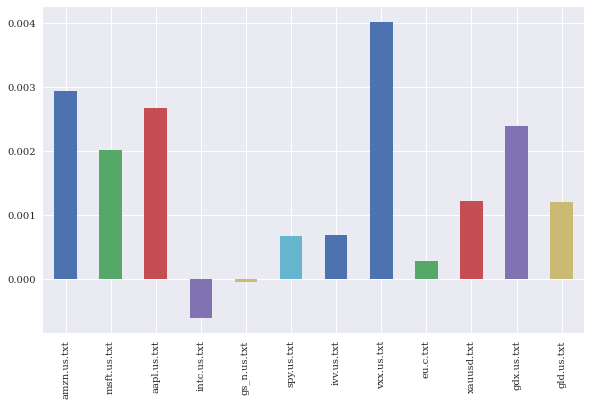

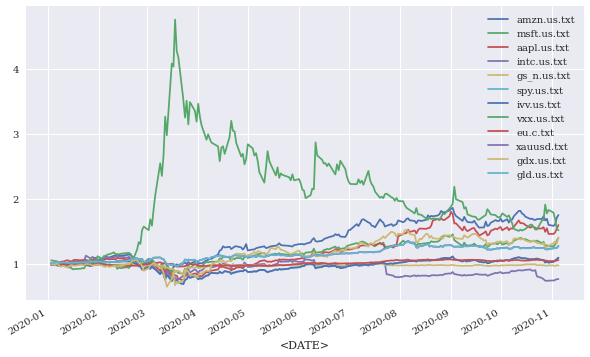

In [10]:
# Python for Finance, 2nd ed., Hilpisch, Ives
# Chapter 8 - Financial Time Series
# Figure 8-2 Mean values of percentage changes as bar plot
# Figure 8-3 Cumulative log returns over time
# https://stooq.com/db/h/
# https://www.datacamp.com/community/tutorials/pandas-tutorial-dataframe-python
# Python 3

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn')
mpl.rcParams['font.family']='serif'

data = pd.read_csv('data.csv', index_col=0, parse_dates=True)

# Percentage Returns
data.pct_change().mean().plot(kind='bar', figsize=(9.7,6))
plt.savefig('PFF_Ch8_Fig_8-2.png')

# Log Returns
rets = np.log(data/data.shift(1))
rets.cumsum().apply(np.exp).plot(figsize=(10,6))
plt.savefig('PFF_Ch8_Fig_8-3.png')

In [4]:
#Resampling from daily to weekly

closePriceSymbolList.resample('1w', label='right').last().head()

,amzn.us.txt,msft.us.txt,aapl.us.txt,intc.us.txt,gs_n.us.txt,spy.us.txt,ivv.us.txt,vxx.us.txt,eu.c.txt,xauusd.txt,gdx.us.txt,gld.us.txt
<DATE>,,,,,,,,,,,,
2020-01-05,1874.97,157.37,73.850,59.068,26.8800,317.84,319.02,15.29,1.11575,1549.02,29.17,145.86
2020-01-12,1883.16,160.06,77.050,57.929,26.8701,321.09,322.29,14.12,1.11182,1560.30,28.45,146.91
2020-01-19,1864.72,165.78,79.138,58.577,27.1100,327.24,328.55,13.32,1.10896,1557.07,28.42,146.58
2020-01-26,1861.64,163.73,79.032,67.294,26.9600,324.10,325.34,14.24,1.10228,1571.66,29.22,147.98
2020-02-02,2008.72,168.89,76.850,62.833,26.5600,317.16,318.45,16.20,1.10936,1586.88,28.99,149.33


In [6]:
#Resampling from weekly to monthly
closePriceSymbolList.resample('1m', label='right').last().head()

,amzn.us.txt,msft.us.txt,aapl.us.txt,intc.us.txt,gs_n.us.txt,spy.us.txt,ivv.us.txt,vxx.us.txt,eu.c.txt,xauusd.txt,gdx.us.txt,gld.us.txt
<DATE>,,,,,,,,,,,,
2020-01-31,2008.72,168.89,76.850,62.833,26.56,317.16,318.45,16.20,1.10936,1586.880,28.99,149.33
2020-02-29,1883.75,161.17,68.032,54.836,25.81,292.06,291.53,22.81,1.10248,1577.400,26.22,148.38
2020-03-31,1949.72,156.89,63.285,53.453,25.42,255.60,256.16,46.25,1.10315,1575.150,23.04,148.05
2020-04-30,2474.00,178.28,73.120,59.241,26.36,288.05,288.65,37.87,1.09512,1686.855,32.26,158.80
2020-05-31,2442.37,182.81,79.342,62.505,26.15,301.77,302.54,33.13,1.11046,1731.500,34.32,162.91


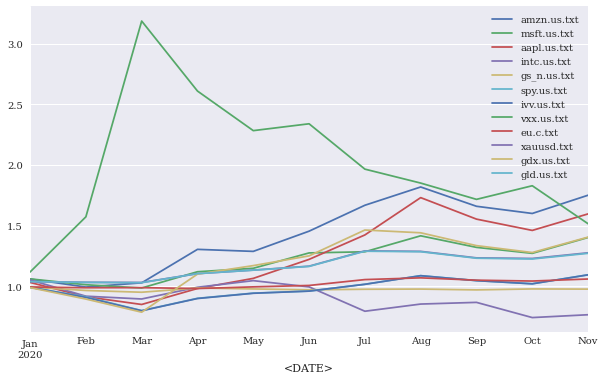

In [8]:
#Resampled cumulative log returns over time (monthly)
rets.cumsum().apply(np.exp).resample('1m', label='right').last().plot(figsize=(10,6))